Student Placement Analysis

In [2]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv("college_student_placement_dataset.csv")

In [4]:
# Basic data check
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe(include='all'))


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None

--- Missing Values ---
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
I

In [5]:
# Encode categorical features
le = LabelEncoder()
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])  # Yes=1, No=0
df['Placement'] = le.fit_transform(df['Placement'])  # Yes=1, No=0

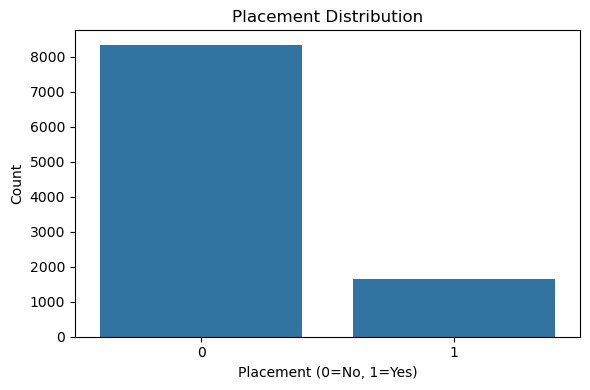

In [6]:
# Visualize placement distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Placement')
plt.title("Placement Distribution")
plt.xlabel("Placement (0=No, 1=Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

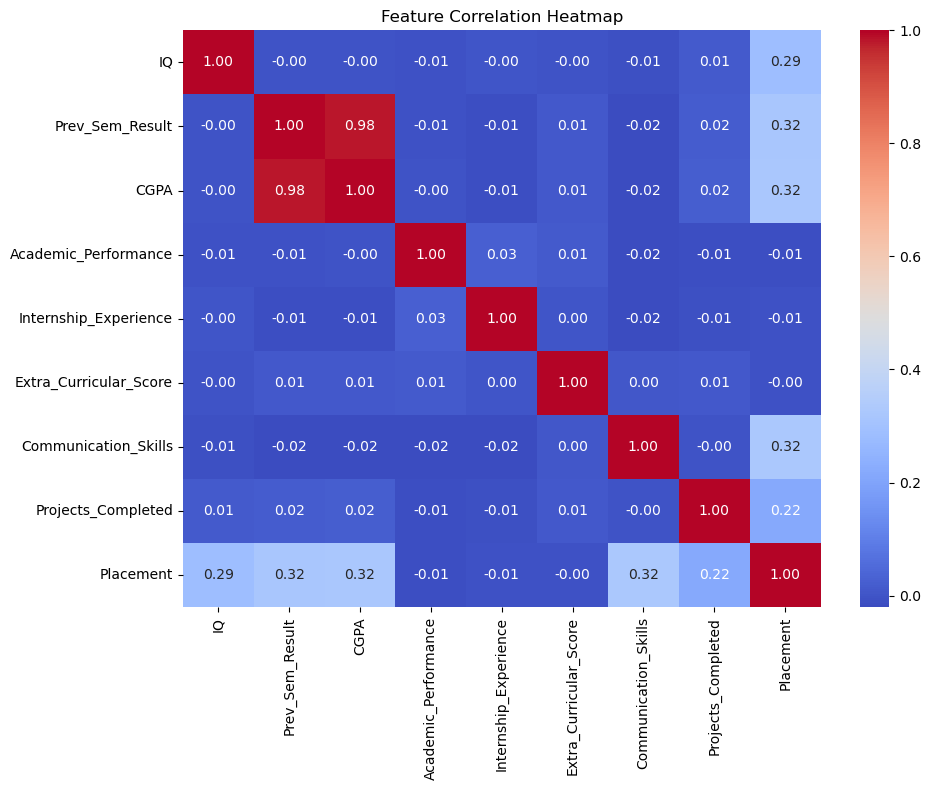

In [7]:
# Correlation heatmap (exclude non-numeric columns like 'College_ID')
numeric_df = df.select_dtypes(include='number')  # Keeps only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [8]:
# Feature selection and split
X = df.drop(['Placement', 'College_ID'], axis=1)
y = df['Placement']

In [17]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("\n--- Accuracy Score ---")
print(accuracy_score(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))


--- Accuracy Score ---
1.0

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Confusion Matrix ---
[[1674    0]
 [   0  326]]


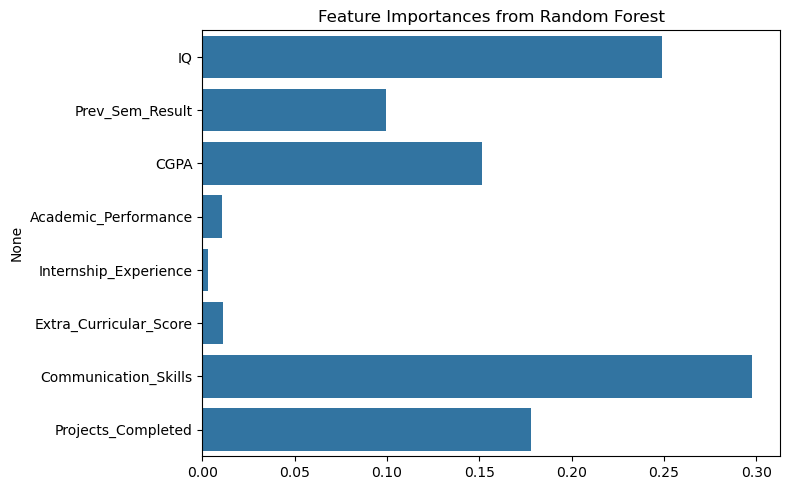

In [23]:
# Feature importance plot
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()